## Langkah-langkah Hands-On


## 1. Installasi Anaconda

- **Langkah 1: Unduh dan Instal Anaconda**
  Anaconda adalah platform distribusi Python yang menyertakan berbagai alat pengembangan, termasuk Jupyter Notebook. Ikuti langkah-langkah instalasi sesuai sistem operasi:
  - Unduh Anaconda: [Download Anaconda](https://www.anaconda.com/products/individual)
  - Instal sesuai instruksi yang ada di situs web tersebut (Windows/Mac/Linux).

- **Langkah 2: Menginstal PySpark di Anaconda**
  Setelah Anaconda terinstal, tambahkan PySpark:
  ```bash
  Dengan perintah 'pip install pyspark==3.4.1' di terminal
  ```

- **Langkah 3: Menginstal Pandas**
  Untuk memudahkan data analysis, install Pandas:
  ```bash
  Dengan perintah 'pip install pandas' di terminal
  ```

- **Langkah 4: Menginstal Findspark**
  ```bash
  Dengan perintah 'pip install findspark' di terminal
  ```
- **Setelah installasi selesai, membuka vscode melalui anaconda. jika vscode sudah pernah di install ada tulisan 'launch', sedangkan jika belum install maka ada tulisan 'install'**
  
- **Membuat project baru di vscode berisi praktikum ini**


**2. Praktik dengan Pyspark**
- **Tugas 1**: Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [6]:
import findspark
findspark.init()

**Penjelasan:**

**1.'import findspark'**: Mengimpor modul **findspark**, guna untuk mengkofigurasi jalur Spark.

**2. 'findspark.init()'**: Menginisialisasi **'findspark'** sehingga Python dapat menemukan lokasi instalasi Spark. Dengan menjalankan ini, Anda dapat mengimpor modul Spark (pyspark) tanpa harus mengonfigurasi variabel lingkungan seperti SPARK_HOME secara manual.

In [7]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [
    ("Ali", 34, "Guru", "Menulis", "Laki-laki"),
    ("Budi", 23, "Arsitektur", "Menggambar", "Laki-laki"),
    ("Citra", 29, "Tentara", "Berenang", "Perempuan"),
    ("Dina", 45, "Dokter", "Membaca", "Perempuan"),
    ("Manda", 24, "Engineer", "Mengoding", "Perempuan")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+



**Penjelasan:**

**1. 'From pyspark.sql import SparkSession'** untuk mengimport **SparkSession`** dari PysPark

**2. Membuat DataFrame** dengan mendefinisikan data dan nama kolom

**3. Menampilkan DataFrame** menggunakan 'df.show()'

**3. Praktik Pyspark Lanjutan**
- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [8]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [
    ("Ali", 34, "Guru", "Menulis", "Laki-laki"),
    ("Budi", 23, "Arsitektur", "Menggambar", "Laki-laki"),
    ("Citra", 29, "Tentara", "Berenang", "Perempuan"),
    ("Dina", 45, "Dokter", "Membaca", "Perempuan"),
    ("Manda", 24, "Engineer", "Mengoding", "Perempuan")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 20)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+

+---------+
|avg(Usia)|
+---------+
|     31.0|
+---------+

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---

**Penjelasan:**

**1. Filtering Data** untuk mendapatkan data dengan usia > 20

**2. Menghitung rata-rata kolom usia** menggunakan 'avg(avg("usia"))` untuk group tersebut `groupBy`

**3. Mengurutkan data** Berdasarkan usia dari usia yang tinggi ke yang rendah lalu data ditampilkan menggunakan **`show`**.

**4. Praktik dengan Pandas**
- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

In [12]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina", "Manda"], 
               "Usia": [34, 23, 29, 45, 24], 
               "Pekerjaan": ["Guru", "Arsitektur", "Tentara", "Dokter", "Engineer"],
               "Hobi": ["Menulis", "Menggambar", "Berenang", "Membaca", "Mengoding"],
               "Gender": ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan", "Perempuan"]}

# Mengonversi dictionary menjadi DataFrame
df_pandas = pd.DataFrame(data_pandas)

# Filter DataFrame untuk usia di atas 25
df_usia_di_atas_20 = df_pandas[df_pandas['Usia'] > 25]

# Menampilkan DataFrame Pandas
print(df_usia_di_atas_20)

    Nama  Usia Pekerjaan      Hobi     Gender
0    Ali    34      Guru   Menulis  Laki-laki
2  Citra    29   Tentara  Berenang  Perempuan
3   Dina    45    Dokter   Membaca  Perempuan


**Penjelasan:**

**1. Membuat DataFrame**: `data_pandas adalah dictionary yang berisi data dengan beberapa kolom: Nama, Usia, Pekerjaan, Hobi, dan Gender.

**2. Mengorversi dictionary menjadi dataFrame**: df_pandas = pd.DataFrame(data_pandas) mengonversi dictionary ini menjadi DataFrame Pandas, yang merupakan struktur data tabular dengan baris dan kolom.

**3. Memfilter DataFrame yang Difilter**: memfilter dataFrame sehingga hanya menyimpan baris-baris di mana 'usia' lebih dari 25 tahun.

**4. 'print'** untuk menampilkan usia lebih dari 25

**5. Praktik Pandas lanjutan**
- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


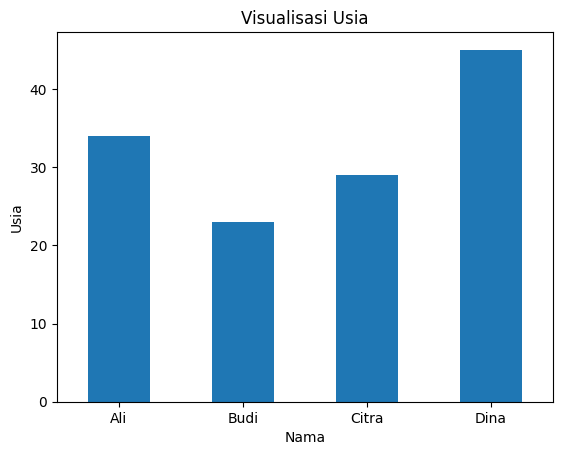

In [13]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.xlabel("Nama") #untuk mengatur label pada sumbu X
plt.ylabel("Usia") #untuk mengatur label pada sumbu Y
plt.title("Visualisasi Usia") #untuk mengatur judul grafik
plt.xticks(ticks=range(len(df_pandas)), labels=df_pandas['Nama'], rotation=0) #untuk mengatur tampilan label pada sumbu X sesuai dengan nama pada dataFrame
plt.show()

**Penjelasan:**

   **1. Membuat dua DataFrame** yang pertama DataFrame pandas(Nama dan usia), lalu buat dataFrame yang kedua(Nama dan Pekerjaan) untuk digabungkan antara dua dataFrame tersebut menggunakan 'Join DataFrame'.

   **2. Statistik Deskriptif** Menghitung statistik dasar (seperti rata-rata, standar deviasi) dari DataFrame df_pandas.

   **3. Plotting data** Membuat Grafik batang untuk memvisualisasikan usia masing-masing individu, dengan sumbu 'x' dan sumbu 'y'.

**6. Menggabungkan PySpark dengan Pandas**
- **Tugas 5**: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

In [14]:
from pyspark.sql import SparkSession
import pandas as pdspark

# Membuat SparkSession
spark = SparkSession.builder.appName("DataFrameExample").getOrCreate()

# Membuat DataFrame di pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Manda"],
    "Usia": [34, 23, 29, 45, 24],
    "Pekerjaan": ["Guru", "Arsitektur", "Tentara", "Dokter", "Engineer"],
    'Hobi': ['Menulis', 'Menggambar', 'Berenang', 'Membaca', 'Mengoding'],
    'Gender': ['Laki-laki', 'Laki-laki', 'Perempuan', 'Perempuan', 'Perempuan']
}

df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Membuat DataFrame langsung di PySpark
data_spark = [
    ("Faya", 25, "Koki", "Memasak", "Perempuan"),
    ("Kana", 26, "Pedagang", "Olahraga", "Perempuan"),
    ("Wijo", 35, "Teknisi", "Memancing", "Laki-laki")
]

df_spark = spark.createDataFrame(data_spark, ['Nama', 'Usia', 'Pekerjaan', 'Hobi', 'Gender'])

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Menggabungkan DataFrame dari pandas ke pyspark
df_combined = df_spark.union(df_spark_from_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menampilkan DataFrame hasil gabungan
df_combined.show()

# Menghitung rata-rata usia
rata_rata_usia = df_combined.groupBy().avg('usia').collect()[0][0]
print(f"Rata-rata usia: {rata_rata_usia}")

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
| Faya|  25|      Koki|   Memasak|Perempuan|
| Kana|  26|  Pedagang|  Olahraga|Perempuan|
| Wijo|  35|   Teknisi| Memancing|Laki-laki|
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+

Rata-rata usia: 30.125


**Penjelasan:**

**1. Inisialisasi SparkSession** dengan nama "DataFrameExample".

**2. Konversi dataFrame** dari Pandas ke PySpark, dari Pyspark ke Pandas

**3. Gabungkan kedua data** Menggabungkan dua DataFrame PySpark

**4. Menampilkan dan Menghitung Rata-rata usia** Menampilkan DataFrame hasil konversi dan gabungan.
Menghitung rata-rata usia dari DataFrame gabungan.

**7. Konversi Data antara PySpark dengan Pandas**
- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.

In [15]:
from pyspark.sql import SparkSession
import pandas as pdspark

# Membuat SparkSession
spark = SparkSession.builder.appName("DataFrameExample").getOrCreate()

# Membuat DataFrame di pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Manda"],
    "Usia": [34, 23, 29, 45, 24],
    "Pekerjaan": ["Guru", "Arsitektur", "Tentara", "Dokter", "Engineer"],
    'Hobi': ['Menulis', 'Menggambar', 'Berenang', 'Membaca', 'Mengoding'],
    'Gender': ['Laki-laki', 'Laki-laki', 'Perempuan', 'Perempuan', 'Perempuan']
}

df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Membuat DataFrame langsung di PySpark
data_spark = [
    ("Faya", 25, "Koki", "Memasak", "Perempuan"),
    ("Kana", 26, "Pedagang", "Olahraga", "Perempuan"),
    ("Wijo", 35, "Teknisi", "Memancing", "Laki-laki")
]

df_spark = spark.createDataFrame(data_spark, ['Nama', 'Usia', 'Pekerjaan', 'Hobi', 'Gender'])

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Menggabungkan DataFrame dari pandas ke pyspark
df_combined = df_spark.union(df_spark_from_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menampilkan DataFrame hasil gabungan
df_combined.show()

# Menghitung nilai maksimum usia
nilai_maksimum_usia = df_combined.agg({"Usia": "max"}).collect()[0][0]
print(f"Nilai maksimum usia: {nilai_maksimum_usia}")

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+

+-----+----+----------+----------+---------+
| Nama|Usia| Pekerjaan|      Hobi|   Gender|
+-----+----+----------+----------+---------+
| Faya|  25|      Koki|   Memasak|Perempuan|
| Kana|  26|  Pedagang|  Olahraga|Perempuan|
| Wijo|  35|   Teknisi| Memancing|Laki-laki|
|  Ali|  34|      Guru|   Menulis|Laki-laki|
| Budi|  23|Arsitektur|Menggambar|Laki-laki|
|Citra|  29|   Tentara|  Berenang|Perempuan|
| Dina|  45|    Dokter|   Membaca|Perempuan|
|Manda|  24|  Engineer| Mengoding|Perempuan|
+-----+----+----------+----------+---------+

Nilai maksimum usia: 45


**Penjelasan:**

**1. Inisialisasi SparkSession** dengan nama "DataFrameExample".

**2. Konversi dataFrame** dari Pandas ke PySpark, dari Pyspark ke Pandas

**3. Gabungkan kedua data** Menggabungkan dua DataFrame PySpark

**4. Menampilkan DataFrame** Menampilkan data hasil konversi dan gabungan 

**5. Menghitung Nilai Maksimum Usia** Menghitung nilai maksimum dari kolom 'usia' di dataFrame gabungan